# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice_roll(low=1, high=6, times=10):
    return np.random.randint(low, high + 1, times)

In [3]:
df10 = pd.DataFrame(dice_roll(), columns=['value'])
df10

,value
0,3
1,1
2,4
3,4
4,6
5,2
6,5
7,2
8,1
9,1


#### 2.- Plot the results sorted by value.

<Axes: ylabel='Frequency'>

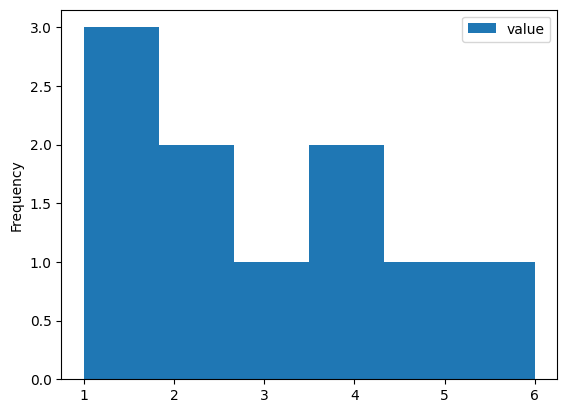

In [4]:
df10.plot.hist(bins=6)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<Axes: xlabel='value'>

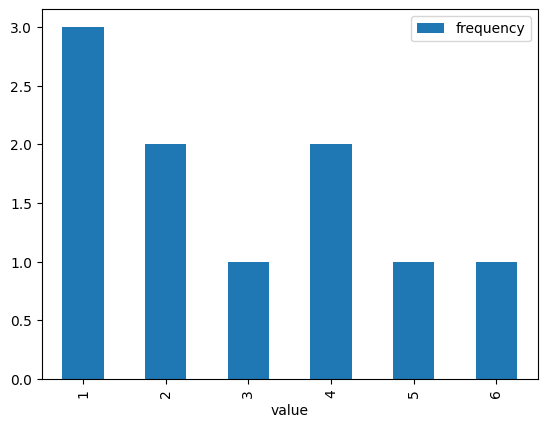

In [5]:
df10_f = df10.value_counts().reset_index(name='frequency').sort_values('value').reset_index(drop=True)
df10_f.plot.bar(x='value',y='frequency' )

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def calc_mean(values):
    return sum(values) / len(values)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
calc_mean(df10_f['frequency'])

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
def calc_median(values):
    values = values.sort_values().reset_index(drop=True)
    if len(values) % 2 == 0:
        return (values[int(len(values)/2 - 1)] + values[int(len(values)/2)]) / 2
    else:
        return values[int(len(values) // 2)]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [68]:
def quartiles(values):
    values = values.sort_values().reset_index(drop=True)
    n = len(values)    
    
    q2 = calc_median(values)
  
    # q1 calculation:
    if n % 4 == 0:
        q1 = (values[int(n/4) - 1] + values[int(n/4)]) / 2
    else:
        q1 = values[n//4]
    
    # q3 calculation:    
    if (n*3) % 4 == 0:
        q3 = (values[int(n*3/4 - 1)] + values[int(n*3/4)]) / 2
    else:
        q3 = values[(n*3)//4]  
        
    
    return q1, q2, q3

In [16]:
calc_median(df10_f['frequency'])

1.5

In [70]:
a, b, c = quartiles(df10_f['frequency'])

a, b, c

(1, 1.5, 2)

In [20]:
df10_f['frequency'].sort_values()

2    1
4    1
5    1
1    2
3    2
0    3
Name: frequency, dtype: int64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<Axes: ylabel='Frequency'>

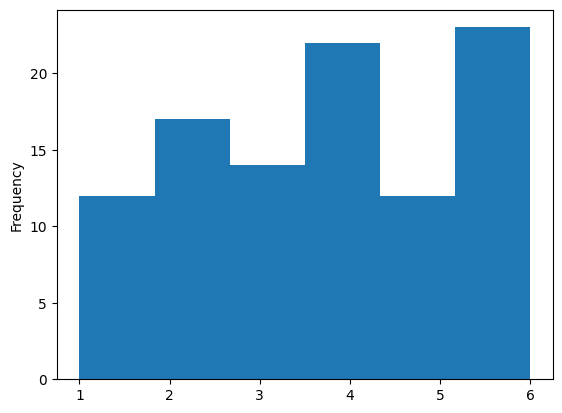

In [21]:
df100 = pd.read_csv('../data/roll_the_dice_hundred.csv')
df100['value'].plot.hist(bins=6)

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [22]:
calc_mean(df100['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [23]:
df100_f = df100['value'].value_counts().reset_index(name='frequency').sort_values('index').reset_index(drop=True)
df100_f = df100_f.rename(columns={'index':'value'})
df100_f

,value,frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<Axes: xlabel='value'>

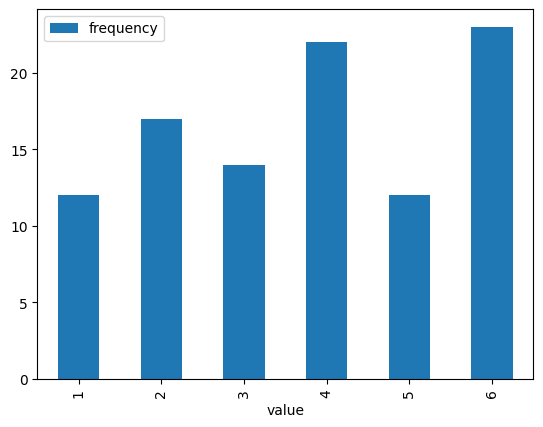

In [24]:
df100_f.plot.bar(x='value',y='frequency' )

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<Axes: ylabel='Frequency'>

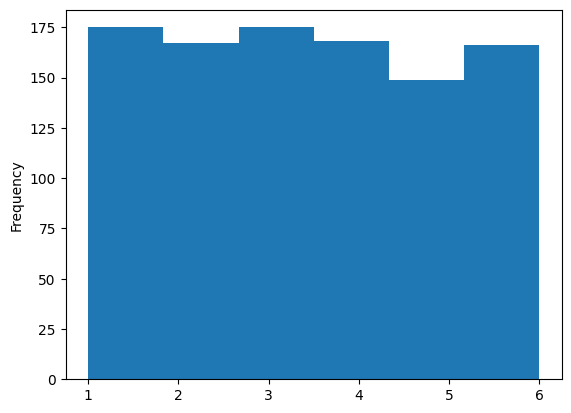

In [25]:
df1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
df1000['value'].plot.hist(bins=6)

In [26]:
"""
your comments here

the frequency tends to stabilize the higher the number of rolls due to probability.
"""

'\nyour comments here\n\nthe frequency tends to stabilize the higher the number of rolls due to probability.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<Axes: ylabel='Frequency'>

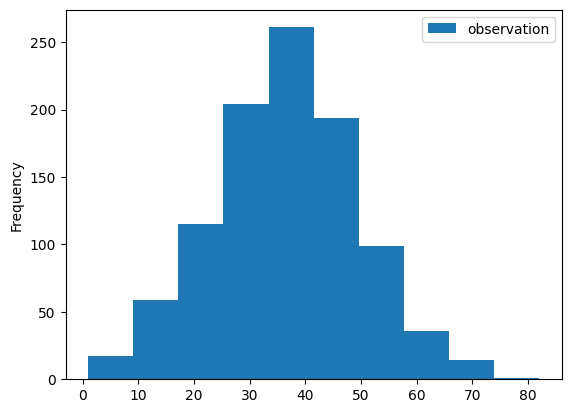

In [30]:
df_ages = pd.read_csv('../data/ages_population.csv')
df_ages.plot.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [37]:
print(f'The mean is: {calc_mean(df_ages["observation"])}',
      f'\nThe standart deviation is: {np.std(df_ages["observation"])}')

The mean is: 36.56 
The standart deviation is: 12.81008977329979


In [73]:
a, b, c = quartiles(df_ages["observation"])

a, b, c

(28.0, 37.0, 45.0)

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<Axes: ylabel='Frequency'>

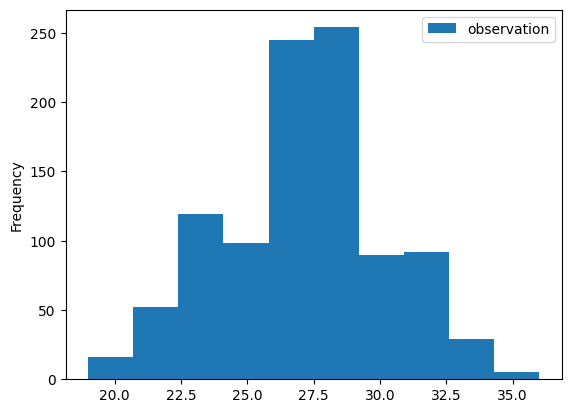

In [38]:
df_ages_2 = pd.read_csv('../data/ages_population2.csv')
df_ages_2.plot.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [39]:
print(f'The mean is: {calc_mean(df_ages_2["observation"])}',
      f'\nThe standart deviation is: {np.std(df_ages_2["observation"])}')

The mean is: 27.155 
The standart deviation is: 2.9683286543103704


In [72]:
a, b, c = quartiles(df_ages_2["observation"])

a, b, c

(25.0, 27.0, 29.0)

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<Axes: ylabel='Frequency'>

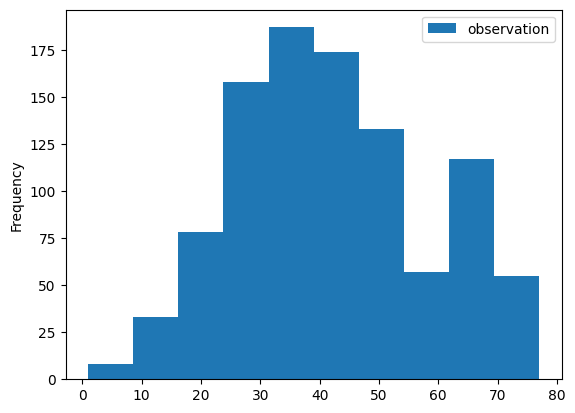

In [40]:
df_ages_3 = pd.read_csv('../data/ages_population3.csv')
df_ages_3.plot.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [41]:
print(f'The mean is: {calc_mean(df_ages_3["observation"])}',
      f'\nThe standart deviation is: {np.std(df_ages_3["observation"])}')

The mean is: 41.989 
The standart deviation is: 16.136631587788084


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [69]:
a, b, c = quartiles(df_ages_3["observation"])

a, b, c

(30.0, 40.0, 53.0)

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [76]:
values = df_ages_3["observation"].sort_values().reset_index(drop=True)

In [83]:
print(f'p10 is: {values[99]}',
      f'\np20 is: {values[199]}',
      f'\np30 is: {values[299]}',
      f'\np40 is: {values[399]}',
      f'\np50 is: {values[499]}',
      f'\np60 is: {values[599]}',
      f'\np70 is: {values[699]}',
      f'\np80 is: {values[799]}',
      f'\np90 is: {values[899]}',
      f'\np100 is: {values[999]}')

p10 is: 22.0 
p20 is: 28.0 
p30 is: 32.0 
p40 is: 36.0 
p50 is: 40.0 
p60 is: 45.0 
p70 is: 50.0 
p80 is: 57.0 
p90 is: 67.0 
p100 is: 77.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [89]:
mean1 = calc_mean(df_ages["observation"])
mean2 = calc_mean(df_ages_2["observation"])
mean3 = calc_mean(df_ages_3["observation"])
std1 = np.std(df_ages["observation"])
std2 = np.std(df_ages_2["observation"])
std3 = np.std(df_ages_3["observation"])


print(f'Population 1 mean: {mean1}',
      f'\nPopulation 2 mean: {mean2}',
      f'\nPopulation 3 mean: {mean3}',
      f'\nPopulation 1 standart deviation is: {std1}',
      f'\nPopulation 2 standart deviation is: {std2}',
      f'\nPopulation 3 standart deviation is: {std3}')

Population 1 mean: 36.56 
Population 2 mean: 27.155 
Population 3 mean: 41.989 
Population 1 standart deviation is: 12.81008977329979 
Population 2 standart deviation is: 2.9683286543103704 
Population 3 standart deviation is: 16.136631587788084


<Axes: ylabel='Frequency'>

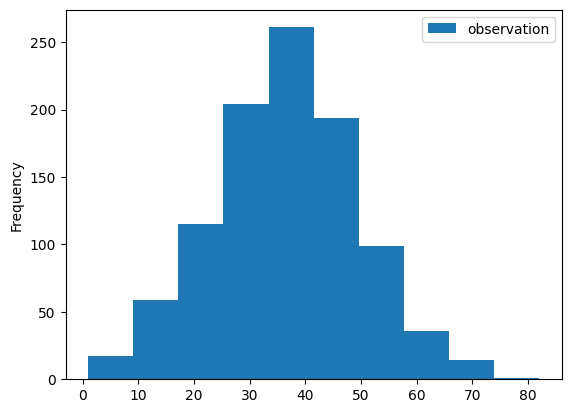

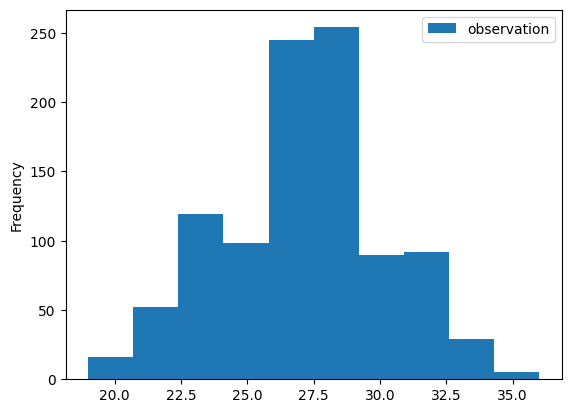

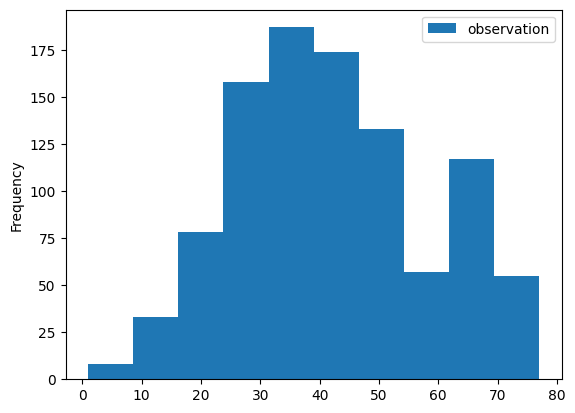

In [86]:
df_ages.plot.hist()
df_ages_2.plot.hist()
df_ages_3.plot.hist()

In [ ]:
"""
your comments here
"""